# fmdtools Tutorial

This tutorial notebook will show some of the basic commands needed to perform resilience analysis in fmdtools.

For some context, it may be helpful to look through the accompanying presentation. This notebook uses the model defined in `ex_pump.py`. In this notebook, we will:

- Load an environment and model
- Simulate the system in nominal and faulty scenarios
- Visualize and quantify the results

## 1.) Loading the environment and model

To load the `fmdtools` environment, we have to import it. 

Since we're in a subfolder of the repository, we need to add the fmdtools folder to the system path. (This would be unnecessary if we installed using `pip`)

In [1]:
import sys
sys.path.append('../')

There are a number of different syntaxes for importing modules. Because of the long names of the module trees, it is often helpful to load the modules individually and abbreviate (e.g. ``import fmdtools.faultsim.propagate as propagate``). Below, import the propagate `fmdtools.faultsim.propagate` and `fmdtools.resultdisp` modules.

In [2]:
import fmdtools.faultsim.propagate as propagate
import fmdtools.resultdisp as rd

Now, import the Pump class defined in the ex_pump module.

In [3]:
from ex_pump import Pump

We can then use that to instantiate a model object. See:

In [8]:
mdl = Pump()

To get started, it can be helpful to view some of the aspects of the model. Try `dir(mdl)`, `mdl.fxns`, `mdl.flows`, `mdl.graph`, etc.

In [6]:
mdl.fxns

{'ImportEE': ImportEE ImportEE function: ({}, {'nom'}),
 'ImportWater': ImportWater ImportWater function: ({}, {'nom'}),
 'ImportSignal': ImportSignal ImportSig function: ({}, {'nom'}),
 'MoveWater': MoveWater MoveWat function: ({'eff': 1.0}, {'nom'}),
 'ExportWater': ExportWater ExportWater function: ({}, {'nom'})}

We can also instantiate this model with different model parameters. By default, this model gets 
`params={'cost':{'repair', 'water'}, 'delay':10, 'units':'hrs'}` but we can pass any set of costs that is a subset of `{'repair', 'water', 'water_exp', 'ee'}` and any int `delay` parameter.

In [21]:
mdl2 = Pump(params={'cost':{'repair', 'water', 'ee'}, 'delay':20, 'units':'hrs'})

# 2.) and 3.) Simulate and visualize the results!

Now, we will use the methods in `propagate` and the visualization modules in `rd` to simulate the model and visualize the results.

### 2a.) Simulate nominal
To simulate the model in the nominal scenario, use the `propagate.nominal` method.

In [18]:
endresults_nominal, resgraph_nominal, mdlhist_nominal=propagate.nominal(mdl, track=True)

What do the results look like? Explore results structures.

In [19]:
endresults_nominal

{'faults': {},
 'classification': {'rate': 1.0, 'cost': 0.0, 'expected cost': 0.0}}

### 2b.) Visualize nominal model
First, we can show the model graph using `rd.graph.show` to see that it was set up correctly. We can do this both on the model graph itself `mdl.graph` and the results of the nominal run `resgraph_nominal` to verify both are fault-free.

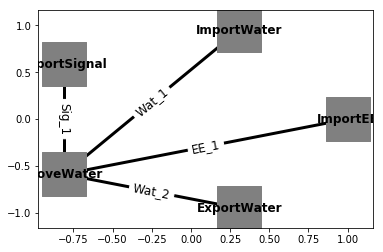

In [24]:
rd.graph.show(mdl.graph)

In [ ]:
We can also view the flow values of the model using ''rd.plot.mdlhistvals''. It may be helpful to only view flows of interest.

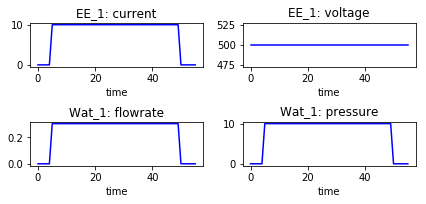

In [34]:
fig = rd.plot.mdlhistvals(mdlhist_nominal, fxnflowvals={'Wat_1':['flowrate','pressure'], 'EE_1':['voltage', 'current']}, returnfig=True)

Note: for quick access to the syntax and options for these methods, type the `?method` or `help(method)` in the terminal. For example `?rd.plot.mdlhistvals`

In [35]:
?rd.plot.mdlhistvals

### 2b.) Simulate a fault mode
To simulate the model in the nominal scenario, use the `propagate.one_fault` method. The set of possible faults is defined in the function definitions in `ex_pump.py`, and we can propagate a fault at any time in the operational interval (0-55 seconds).

In [ ]:
endresults_fault, resgraph_fault, mdlhist_fault=propagate.one_fault(mdl, 'MoveWater', 'short', time=10)

### 3b.) Visualize fault model states

### 4a.) Simulate set of fault modes

### 4b.) Visualize set of fault modes